In [ ]:
# Библиотека Seaborn
# создавать графики более высокого уровня с эстетичным оформлением
# http://seaborn.pydata.org/index.html

In [1]:
import seaborn as sns
print(sns.__version__)

0.11.2


In [ ]:
# метод isin()
# Series.isin(values)
# Для фильтрации по списку значений
# проверяет, есть ли запись в столбце в переданном в метод списке. 
# В результате возвращается привычная нам маска.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html

In [2]:
import pandas as pd
covid_df = pd.read_csv('data/covid_df.csv')
covid_df['date'] = pd.to_datetime(covid_df['date'])
display(covid_df.head(3))
covid_df['date']

,Unnamed: 0,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


0       2020-02-24
1       2020-02-25
2       2020-02-26
3       2020-02-27
4       2020-02-28
           ...    
86780   2020-03-12
86781   2020-03-14
86782   2020-03-15
86783   2020-03-16
86784   2020-03-17
Name: date, Length: 86785, dtype: datetime64[ns]

In [6]:
# будем сравнивать несколько стран: Россию, Австралию, Германию, Канаду и Великобританию. 
# Создадим специальный DataFrame croped_covid_df для этих данных
# добавим информацию о населении стран, чтобы рассчитать ежедневную заболеваемость на 100 человек — заболеваемость в процентах от общего количества населения (daily_confirmed_per_hundred)
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom'] # making a new independent list for the further work
croped_covid_df = covid_df[covid_df['country'].isin(countries)] # filter list with the table column 'country' = mask
# display(croped_covid_df)

# добавим информацию о населении стран
populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
# display(populations)
                           
                       

,country,population
0,Canada,37664517
1,Germany,83721496
2,Russia,145975300
3,Australia,25726900
4,United Kingdom,67802690


In [10]:
# merge croped_covid_df and populations on country
croped_covid_df = croped_covid_df.merge(populations, on = 'country')
display(croped_covid_df.head(2))

,Unnamed: 0,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,...,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population_x,population_y,population
0,3616,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,25726900,25726900
1,3617,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,25726900,25726900


In [11]:
# creating a new data for 'daily_confirmed_per_hundred' as a column with the population calculation
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population']*100
croped_covid_df.head()

,Unnamed: 0,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,...,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population_x,population_y,population,daily_confirmed_per_hundred
0,3616,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25726900,25726900,25726900,NaN
1,3617,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,25726900,25726900,25726900,0.000016
2,3618,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,25726900,25726900,25726900,0.000000
3,3619,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,25726900,25726900,25726900,0.000004
4,3620,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,25726900,25726900,25726900,0.000000


In [ ]:
# метод histplot()
# гистограмма
# https://seaborn.pydata.org/generated/seaborn.histplot.html

In [ ]:
# Основные параметры метода histplot()
# data — DataFrame, по которому строится график;
# x — признак, который будет отложен по оси абсцисс;
# y — признак, который будет отложен по оси ординат;
# hue — группировочный категориальный признак, который позволяет строить отдельный график для каждой категории (не стоит использовать его для гистограмм, но он широко используется для других видов графиков в Seaborn);
# ax — система координат Matplotlib, в которой строится график;
# color — цвет графика;
# bins — число столбцов в гистограмме (по умолчанию вычисляется автоматически с помощью специальных формул);
# kde — параметр, указывающий, стоит ли сглаживать гистограмму кривой (по умолчанию False).

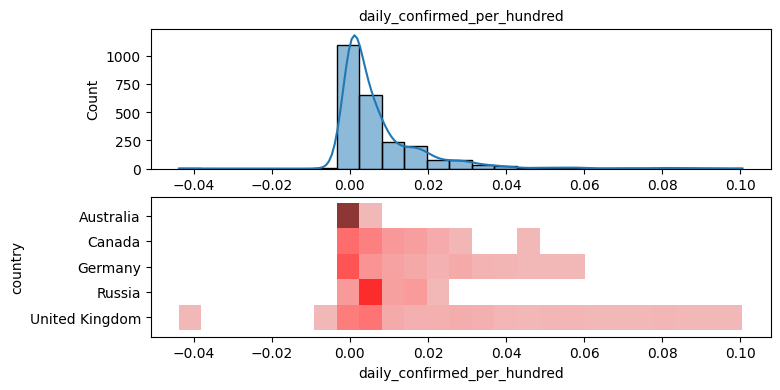

In [16]:
# Построим сразу две гистограммы: 
# одна будет иллюстрировать общее распределение ежедневной заболеваемости (daily_confirmed), 
# а вторая — то же распределение в разрезе стран. 
# создаём две координатные плоскости с помощью метода subplots()
# добавим на первую сглаживающую кривую
#  На второй гистограмме добавляем параметр названия страны по оси y
import matplotlib.pyplot as plt
plt.style.use('default')

# создаём две координатные плоскости с помощью метода subplots()
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (8, 4))

import seaborn as sns
sns.histplot(
    data = croped_covid_df,
    x = 'daily_confirmed_per_hundred',
    bins = 25,
    kde = True,
    ax  = axes[0]
);
axes[0].set_title('daily_confirmed_per_hundred', fontsize = 10)

sns.histplot(
    data = croped_covid_df,
    x = 'daily_confirmed_per_hundred',
    y = 'country',
    bins = 25,
    color = 'red',
    ax = axes[1]
);

In [ ]:
# метод boxplot()
# коробчатые диаграммы 
# seaborn.boxplot(*, 
# x=None, 
# y=None, 
# hue=None,
# data=None, 
# order=None, 
# hue_order=None, 
# orient=None (“v” | “h”, optional), 
# color=None, 
# palette=None, 
# saturation=0.75, 
# width=0.8, 
# dodge=True, 
# fliersize=5, 
# linewidth=None, 
# whis=1.5, 
# ax=None, 
# **kwargs)
# https://seaborn.pydata.org/generated/seaborn.boxplot.html

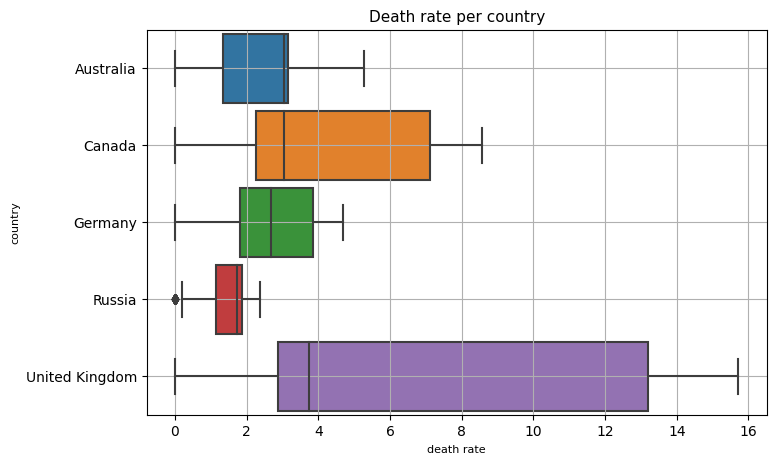

In [19]:
# построим коробчатые диаграммы признака летальности (death_rate)
# Ящики отразим горизонтально 
# (для этого по оси x отложим признак летальности, 
# а по оси y — страны), 
# параметр orient отвечает за ориентацию диаграммы, 
# а width — за ширину коробок:

fig = plt.figure(figsize = (8,5))
boxplot = sns.boxplot(
    data = croped_covid_df,
    x = 'death_rate',
    y = 'country',
    orient= 'h',
    width = 0.9
);
boxplot.set_title('Death rate per country', fontsize = 11);
boxplot.set_xlabel('death rate', fontsize = 8);
boxplot.set_ylabel('country', fontsize = 8);
boxplot.grid()

In [ ]:
# Многоуровневые_столбчатые_диаграммы
# метод barplot()
# столбчатая диаграмма
# seaborn.barplot(*, 
# x=None, 
# y=None, 
# hue=None, (позволяет группировать данные по признаку)
# data=None, 
# order=None, 
# hue_order=None, 
# estimator=<function mean at 0x7ff320f315e0>,  (обозначить статистическую характеристику)
# ci=95, 
# n_boot=1000, 
# units=None, 
# seed=None, 
# orient=None,  (“v” | “h”, optional)
# color=None, 
# palette=None, 
# saturation=0.75, 
# errcolor='.26', 
# errwidth=None, 
# capsize=None, 
# dodge=True, 
# ax=None, 
# **kwargs)
# https://seaborn.pydata.org/generated/seaborn.barplot.html

Text(0.5, 1.0, 'Quartally daily comfirmed')

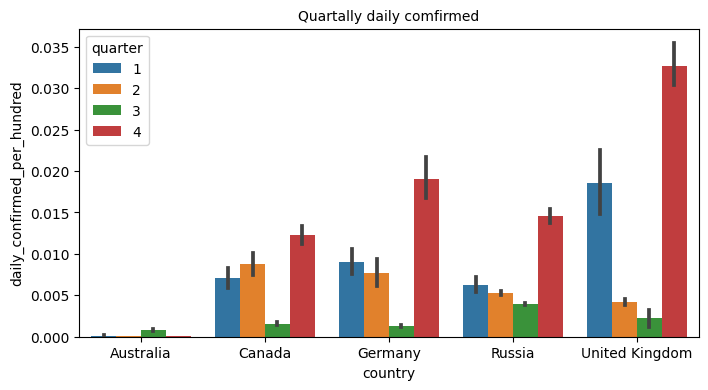

In [26]:
# можем, например, посмотреть на средний ежедневный процент заболевших в странах по кварталам.
# По умолчанию метод отображает среднее по столбцу, который указан в параметре x (можно поменять на другое действие при помощи estimator)
fig = plt.figure(figsize = (8,4))

# creating the column for quater
import pandas as pd
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
# display(croped_covid_df.head())
barplot = sns.barplot(
    data = croped_covid_df,
    x = 'country',
    y = 'daily_confirmed_per_hundred',
    hue = 'quarter'
);
barplot.set_title('Quartally daily comfirmed', fontsize = 10)

In [ ]:
# график jointplot()
# в котором совмещены диаграмма рассеяния и гистограмма
# seaborn.jointplot(*, 
# x=None, 
# y=None, 
# data=None, 
# kind='scatter', ({ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” })
# color=None, (# https://matplotlib.org/stable/api/colors_api.html#module-matplotlib.colors)
# height=6,  (Size of the figure (it will be square).отвечает за высоту и ширину графика (он квадратный).)
# ratio=5, 
# space=0.2, 
# dropna=False, (If True, remove observations that are missing from x and y.)
# xlim=None, (Axis limits to set before plotting. определяют диапазон отображения осей x и y)
# ylim=None, (Axis limits to set before plotting.)
# marginal_ticks=False, 
# joint_kws=None, 
# marginal_kws=None, 
# hue=None,  ( is mapped to determine the color of plot elements.)
# palette=None, 
# hue_order=None, 
# hue_norm=None, 
# **kwargs)
# https://seaborn.pydata.org/generated/seaborn.jointplot.html

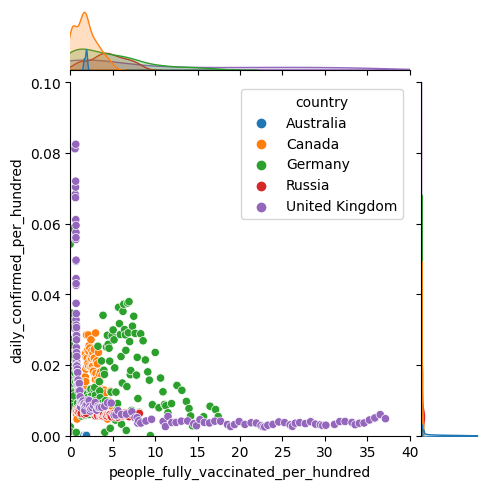

In [32]:
# Построим jointplot зависимости ежедневной заболеваемости в странах 
# от общей численности населения в процентах (daily_confirmed_per_hundred) 
# от числа полностью вакцинированных в процентах (people_fully_vaccinated_per_hundred).
jointplot = sns.jointplot(
    data = croped_covid_df,
    x = 'people_fully_vaccinated_per_hundred',
    y = 'daily_confirmed_per_hundred',
    hue = 'country',
    xlim = (0,40),
    ylim = (0, 0.1),
    height = 5
);


In [ ]:
# Из графика для Великобритании и России наблюдается следующая тенденция:
# с увеличением числа полностью привитых людей уменьшается ежедневное число заболевших

In [ ]:
# тепловая карта
# метод heatmap()
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# метод работает с табличными данными и визуализирует все ячейки таблицы с помощью цвета
# ОБЯЗАТЕЛЬНО создать pivot_table !!!!!!

In [ ]:
# seaborn.heatmap(
    # data,
    # *, 
    # vmin=None, 
    # vmax=None, 
    # cmap=None, (за цветовую гамму графика.)
    # center=None, 
    # robust=False, 
    # annot=None, (отвечает за отображение легенды (аннотации))
    # fmt='.2g', 
    # annot_kws=None, 
    # linewidths=0, 
    # linecolor='white', 
    # cbar=True, 
    # cbar_kws=None, 
    # cbar_ax=None, 
    # square=False, 
    # xticklabels='auto', 
    # yticklabels='auto', 
    # mask=None, 
    # ax=None, 
    # **kwargs)

In [ ]:
# Допустим, мы хотим сравнить темпы вакцинации по странам во времени. Вы, скорее всего, сразу подумали о линейном графике. Но давайте мыслить шире. Когда мы хотим сравнить скорость изменения показателей по малому количеству категорий (в данном случае — по странам, а их у нас их всего пять), нагляднее всего будет тепловая карта.

In [35]:
# Предварительно создадим сводную таблицу: 
# по столбцам отложим признак даты, 
# а по строкам — страны. 
# В ячейках таблицы будет находиться процент вакцинированных (первым компонентом) людей в стране на определённую дату. 
# Чтобы даты отображались на тепловой карте верно, их необходимо привести к типу string.
import pandas as pd
pivot = croped_covid_df.pivot_table(
    values = 'people_vaccinated_per_hundred',
    columns = 'date',
    index = 'country'
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,...,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


Text(0.5, 1.0, 'Vaccination heatmap')

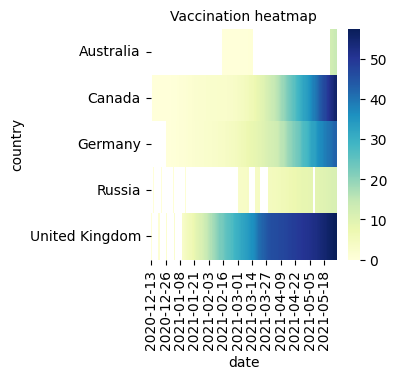

In [50]:
fig = plt.figure(figsize = (3,3), tight_layout = False, dpi = 100.0) # dpi = размер всего графика
heatmap =sns.heatmap(
    data = pivot,
    cmap='YlGnBu'
)
heatmap.set_title('Vaccination heatmap', fontsize = 10)

In [ ]:
# По тепловой карте легко можно понять, в каких странах темпы вакцинации выше, а в каких — ниже. 

In [ ]:
# http://seaborn.pydata.org/examples/index.html

Text(0.5, 1.0, 'Тепловая карта заболеваемости')

<Figure size 100x300 with 0 Axes>

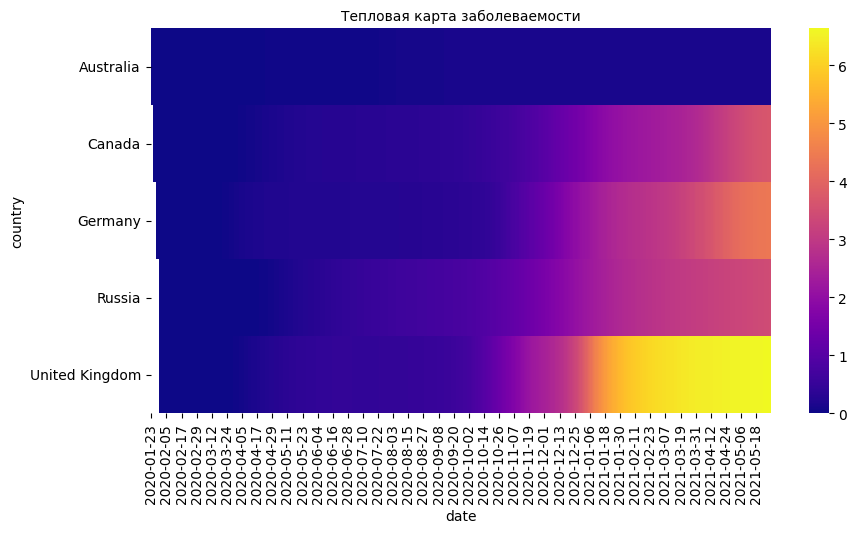

In [58]:
# Создайте новый признак confirmed_per_hundred, который покажет процентное отношение заболевших вирусом к общему числу населения в странах (confirmed/population*100).
# Постройте тепловую карту, которая покажет, как росло число заболевших в процентах от общего числа населения (confirmed_per_hundred) в странах из таблицы croped_covid_df.
# Выберите верные выводы по построенному графику:
fig = plt.figure(figsize =(1,3))
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed']/croped_covid_df['population'] * 100 # новый признак
pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country'
);
pivot.columns = pivot.columns.astype('string')
fig = plt.figure(figsize=(10, 5))

heatmap = sns.heatmap(data=pivot, cmap='plasma')
heatmap.set_title('Тепловая карта заболеваемости', fontsize=10)

Text(0.5, 1.0, 'Recovery rate')

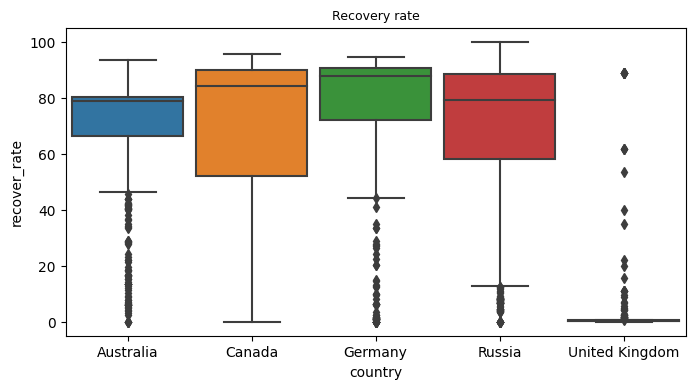

In [59]:
# Постройте коробчатую диаграмму для признака recover_rate (отношение выздоровлений к числу зафиксированных случаев заболевания в процентах).
# Выберите верные выводы по данному графику:
fig = plt.figure(figsize=(8,4))
boxplot = sns.boxplot(
    data=croped_covid_df,
    x='country',
    y='recover_rate',
    orient='v',
    width=0.9
)
boxplot.set_title('Recovery rate', fontsize = 9)